In [20]:
from astropy.io import fits
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from jwst.pipeline import Detector1Pipeline
from jwst.pipeline import Spec2Pipeline
from jwst.background import BackgroundStep
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
from jwst.flatfield import FlatFieldStep
import crds
from jwst import datamodels

# Run Pipeline

In [6]:
Detector1Pipeline.call('mirisimv2.3sim/mirisimoutput/det_images/det_image_seq1_MIRIMAGE_P750Lexp1.fits', config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim/detector1/')
Detector1Pipeline.call('mirisimv2.3sim/mirisimoutput/det_images/det_image_seq2_MIRIMAGE_P750Lexp1.fits', config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim/detector1/')

2020-08-12 14:00:34,326 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-08-12 14:00:34,332 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-08-12 14:00:34,339 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-08-12 14:00:34,344 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-08-12 14:00:34,350 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-08-12 14:00:34,356 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-08-12 14:00:34,364 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

2020-08-12 14:00:34,892 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'det_image_seq1_MIRIMAGE_P750Lexp1.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-08-12 14:00:35,543 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_miri_dark_0058.fits'.
2020-08-12 14:00:35,582 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits'.
2020-08-12 14:00:35,617 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits'.
2020-08-12 14:00:35,655 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_miri_mask_0023.fits'.
2020-08-12 14:00:35,695 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT 

2020-08-12 14:00:55,805 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(2, 10, 1024, 1032) from det_image_seq1_MIRIMAGE_P750Lexp1.fits>,).
2020-08-12 14:00:55,807 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'mirisimv2.3sim/detector1/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'mirisimv2.3sim/mirisimoutput/det_images', 'dark_output': None}
2020-08-12 14:00:55,838 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_miri_dark_0058.fits
2020-08-12 14:14:46,414 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=2, ngroups=10, nframes=1, groupgap=0
2020-08-12 14:14:46,419 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data ni

2020-08-12 14:15:16,776 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2020-08-12 14:15:17,101 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-08-12 14:15:17,106 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-08-12 14:15:17,112 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-08-12 14:15:17,117 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-08-12 14:15:17,123 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-08-12 14:15:17,129 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-08-12 14:15:17,135 - CRDS - ERROR

2020-08-12 14:15:17,490 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'det_image_seq2_MIRIMAGE_P750Lexp1.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-08-12 14:15:17,579 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_miri_dark_0058.fits'.
2020-08-12 14:15:17,615 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits'.
2020-08-12 14:15:17,640 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits'.
2020-08-12 14:15:17,679 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_miri_mask_0023.fits'.
2020-08-12 14:15:17,739 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT 

2020-08-12 14:15:33,121 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(2, 10, 1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1.fits>,).
2020-08-12 14:15:33,122 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'mirisimv2.3sim/detector1/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'mirisimv2.3sim/mirisimoutput/det_images', 'dark_output': None}
2020-08-12 14:15:33,156 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_miri_dark_0058.fits
2020-08-12 14:25:01,485 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=2, ngroups=10, nframes=1, groupgap=0
2020-08-12 14:25:01,486 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data ni

2020-08-12 14:25:32,854 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


<ImageModel(1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1.fits>

In [8]:
AssignWcsStep.call('mirisimv2.3sim/detector1/det_image_seq1_MIRIMAGE_P750Lexp1_gain_scale.fits', config_file='configfiles/assign_wcs.cfg', output_dir = 'flatfield_testing')
AssignWcsStep.call('mirisimv2.3sim/detector1/det_image_seq2_MIRIMAGE_P750Lexp1_gain_scale.fits', config_file='configfiles/assign_wcs.cfg', output_dir = 'flatfield_testing')

2020-08-12 14:26:45,223 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'
2020-08-12 14:26:45,230 - stpipe.assign_wcs - INFO - AssignWcsStep instance created.
2020-08-12 14:26:45,293 - stpipe.assign_wcs - INFO - Step assign_wcs running with args ('mirisimv2.3sim/detector1/det_image_seq1_MIRIMAGE_P750Lexp1_gain_scale.fits',).
2020-08-12 14:26:45,294 - stpipe.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'flatfield_testing', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-08-12 14:26:47,262 - stpipe.assign_wcs - INFO - Created a MIRI mir_lrs-fixedslit pipeline with references {'distortion': '/grp/crds/cache/references/jwst/jwst_miri_distortion_0028.asdf', 'filteroffset

<ImageModel(1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1_assign_wcs.fits>

In [4]:
bgsub_1 = ['flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_assign_wcs.fits']
bgsub_2 = ['flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_assign_wcs.fits']

In [5]:
BackgroundStep.call('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_assign_wcs.fits', bgsub_1, output_dir = 'flatfield_testing', save_results='True')
BackgroundStep.call('flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_assign_wcs.fits', bgsub_2, output_dir = 'flatfield_testing', save_results='True')

2020-08-05 15:43:46,466 - CRDS - ERROR -  Error determining best reference for 'pars-backgroundstep'  =   Unknown reference type 'pars-backgroundstep'
2020-08-05 15:43:46,468 - stpipe.BackgroundStep - INFO - BackgroundStep instance created.
2020-08-05 15:43:46,538 - stpipe.BackgroundStep - INFO - Step BackgroundStep running with args ('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_assign_wcs.fits', ['flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_assign_wcs.fits']).
2020-08-05 15:43:46,539 - stpipe.BackgroundStep - INFO - Step BackgroundStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'flatfield_testing', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sigma': 3.0, 'maxiters': None}
2020-08-05 15:43:47,490 - stpipe.BackgroundStep - WARNING - /Users/kmurray/anaconda3/envs/pipeline7.5/lib/python3.8/site-packag

<ImageModel(1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1_backgroundstep.fits>

In [6]:
Extract2dStep.call('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_backgroundstep.fits', config_file='configfiles/extract_2d.cfg', output_dir = 'flatfield_testing', save_results='True')
Extract2dStep.call('flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_backgroundstep.fits', config_file='configfiles/extract_2d.cfg', output_dir = 'flatfield_testing', save_results='True')

2020-08-05 15:43:50,221 - CRDS - ERROR -  Error determining best reference for 'pars-extract2dstep'  =   Unknown reference type 'pars-extract2dstep'
2020-08-05 15:43:50,225 - stpipe.extract_2d - INFO - Extract2dStep instance created.
2020-08-05 15:43:50,300 - stpipe.extract_2d - INFO - Step extract_2d running with args ('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_backgroundstep.fits',).
2020-08-05 15:43:50,301 - stpipe.extract_2d - INFO - Step extract_2d parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'flatfield_testing', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_name': None, 'apply_wavecorr': True, 'extract_orders': None, 'extract_height': None, 'grism_objects': None, 'mmag_extract': 99.0}
2020-08-05 15:43:51,219 - stpipe.extract_2d - INFO - EXP_TYPE is MIR_LRS-FIXEDSLIT
2020-08-05 15:43:51,220 - stpip

<ImageModel(1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1_extract_2d.fits>

In [7]:
FlatFieldStep.call('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_extract_2d.fits', config_file='configfiles/flat_field.cfg', output_dir = 'flatfield_testing', save_results='True')
FlatFieldStep.call('flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_extract_2d.fits', config_file='configfiles/flat_field.cfg', output_dir = 'flatfield_testing', save_results='True')

2020-08-05 15:43:53,662 - CRDS - ERROR -  Error determining best reference for 'pars-flatfieldstep'  =   Unknown reference type 'pars-flatfieldstep'
2020-08-05 15:43:53,665 - stpipe.flat_field - INFO - FlatFieldStep instance created.
2020-08-05 15:43:53,739 - stpipe.flat_field - INFO - Step flat_field running with args ('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_extract_2d.fits',).
2020-08-05 15:43:53,741 - stpipe.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'flatfield_testing', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False}
2020-08-05 15:43:56,807 - stpipe.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-05 15:43:56,808 - stpipe.flat_field - WARNING - Keyword CDP_LOW_Q

<ImageModel(1024, 1032) from det_image_seq2_MIRIMAGE_P750Lexp1_flat_field.fits>

# Flat Field Step Check

Open up flat file for comparison

In [13]:
flat1_file = fits.open('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_flat_field.fits')
flat2_file = fits.open('flatfield_testing/det_image_seq2_MIRIMAGE_P750Lexp1_flat_field.fits')
flat1 = flat1_file[1]
flat2 = flat2_file[1]

2020-08-13 11:47:28,171 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/pipeline7.5/lib/python3.8/site-packages/astropy/io/fits/util.py:205: ResourceWarning: unclosed <ssl.SSLSocket [closed] fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0>
  for sub in itersubclasses(sub, _seen):



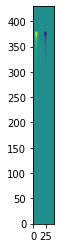

In [90]:
plt.imshow(flat1.data[0:430,304:346], origin='lower')

In [16]:
background1_file = fits.open('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_backgroundstep.fits')
background1 = background1_file[1]
backgroundcheck = background1.data[250:270,250:270]

Get reference file from header and read in

In [74]:
flatreffile = flat1_file[0].header['R_FLAT']
basename = crds.core.config.pop_crds_uri(flatreffile)
filepath = crds.locate_file(basename, "jwst")
reffile =  datamodels.open(filepath)
print(reffile.data[0:430,304:346])

2020-08-13 12:52:59,389 - stpipe - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-13 12:52:59,390 - stpipe - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-13 12:52:59,391 - stpipe - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-13 12:52:59,408 - stpipe - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-13 12:52:59,448 - stpipe - WARNING - <ipython-input-74-779ac008f9e4>:5: ResourceWarning: unclosed file <_io.FileIO name='/grp/crds/cache/references/jwst/jwst_miri_flat_0472.fits' mode='rb' closefd=True>
  flat = fits.open(filepath)



[[       nan        nan        nan ...        nan        nan        nan]
 [0.9958572  0.98931766 0.99252474 ... 1.0134931  0.9897802  0.9874312 ]
 [1.0016237  0.99366105 0.9933627  ... 0.99872184 1.0000159  0.99906373]
 ...
 [0.9989251  1.0000654  0.9975553  ... 1.0003941  0.9992759  0.99652886]
 [0.99758166 1.0044369  0.9954789  ... 1.0049331  1.0021932  1.0005535 ]
 [1.0038248  0.99606854 1.0006624  ... 1.0021372  1.004601   0.99970764]]


Pull in file from step before flat, perform manual flatfielding

In [76]:
extract2d_file = fits.open('flatfield_testing/det_image_seq1_MIRIMAGE_P750Lexp1_extract_2d.fits')
extract2d = extract2d_file[1].data
#print(extract2d[250:270,250:270])

In [81]:
manualflat = np.divide(extract2d, reffile.data)
print(manualflat[1:430,304:346])

[[-0.49658677  1.1997564   0.07553273 ...  0.35739237  1.5606736
  -0.02699204]
 [-0.03231895 -0.07578494 -1.0298055  ...  0.8523488   0.53322256
   1.0129174 ]
 [-0.11533108 -0.03248338  0.28844243 ... -0.4361805   0.1224862
  -0.08991831]
 ...
 [-0.3116292  -0.13244067  0.0461361  ... -0.09970342  0.01006156
   0.8100981 ]
 [-0.16921817 -0.02427088 -0.16553047 ...  0.19043578 -0.4689675
   0.0161006 ]
 [-2.3053317   0.16158465  0.4160134  ... -0.6654761  -0.00872278
   0.03869664]]


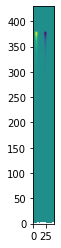

In [89]:
plt.imshow(manualflat[0:430,304:346], origin='lower')

Compare outputs

In [88]:
flatcheck = (flat1.data-manualflat)
print(flatcheck[1:430,304:346])
printcheck = np.mean(flatcheck[2:430,304:346])
print(printcheck)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
